Imports

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
import ast 
import seaborn as sns

In [14]:
csv_path = "/Users/alexandranava/Desktop/Spores/M4581_s1/Analysis/V3/Model_Data.csv"
plots_folder = "/Users/alexandranava/Desktop/Spores/M4581_s1/Analysis/V3/Plots/"
df = pd.read_csv(csv_path)

print(df.columns)

INTENSITY = df["INTENSITY"]
AREA = df["AREA"]
GERMINATION = df["GERMINATION"]

Index(['Unnamed: 0', 'INTENSITY', 'AREA', 'GERMINANT EXPOSURE', 'GERMINATION',
       'X_POSITION', 'Y_POSITION'],
      dtype='object')


## Histogram for Germination Frame Frequency

In [15]:
def get_germination_index() -> list:
  ''' 
  gets germination frame index for each spore 
  returns a list of frame numbers
  '''
  #list where germination occurs for each spore
  germination_frames_list = []

  for spore_index in range(len(GERMINATION)):
    germination_frames = GERMINATION[spore_index].replace("[", "")
    germination_frames = germination_frames.split(",")

    frame_index = 0
    for frame in germination_frames: #index starts at 0 

      if int(frame) == 1:
        germination_frames_list.append(frame_index)
        break 
      frame_index += 1
  return germination_frames_list

Frame: 13, Frequency: 1
Frame: 14, Frequency: 4
Frame: 37, Frequency: 5
Frame: 38, Frequency: 20
Frame: 39, Frequency: 1
Frame: 61, Frequency: 3
Frame: 62, Frequency: 12
Frame: 63, Frequency: 2
Frame: 64, Frequency: 1
Frame: 86, Frequency: 4
Frame: 182, Frequency: 1


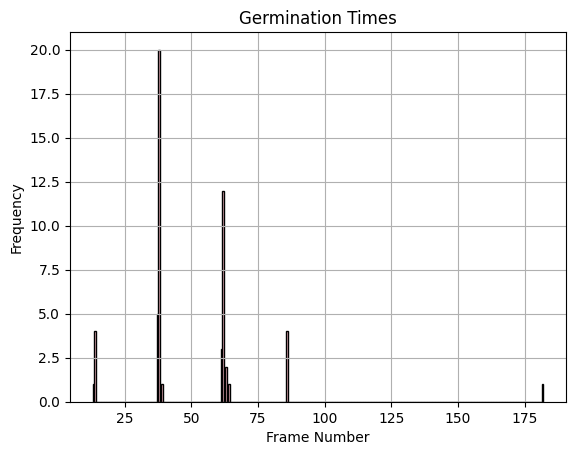

In [16]:
germination_frames_list = get_germination_index()

#print times frame germination occurs
frame_counts = Counter(germination_frames_list)
sorted_frame_counts = sorted(frame_counts.items())
for frame_number, count in sorted_frame_counts:
    print(f"Frame: {frame_number}, Frequency: {count}")
    
#histogram plot 
plt.hist(germination_frames_list, bins=289, color='pink', edgecolor='black')
plt.title("Germination Times")
plt.xlabel("Frame Number")
plt.ylabel("Frequency")
plt.grid()
plt.savefig(plots_folder + "germination_frequency.jpg")

## Descriptive Statistics

79.76694915254237


/var/folders/hf/27j9pt1n18901_qs25pdn5cc0000gn/T/ipykernel_31198/1706971473.py:37: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 4))


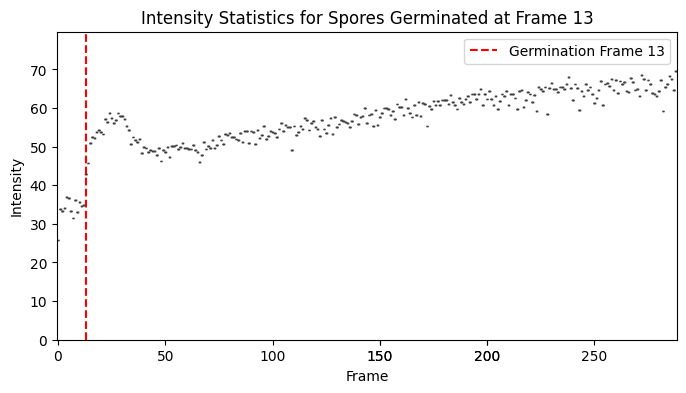

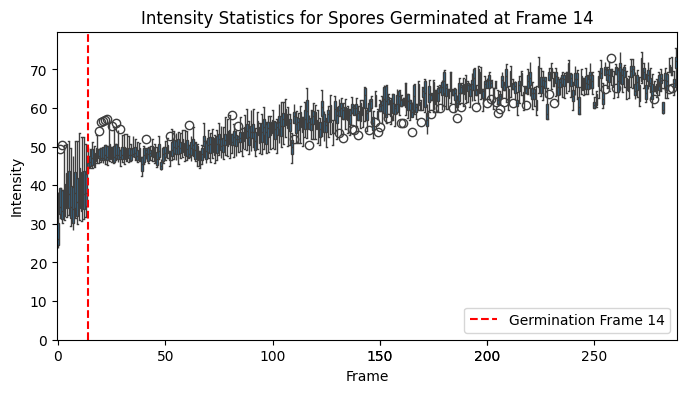

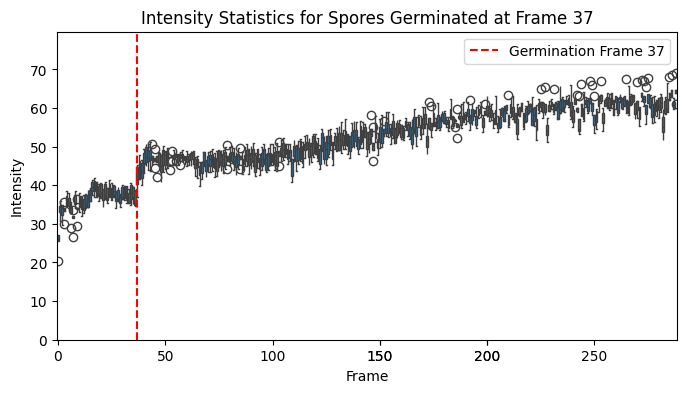

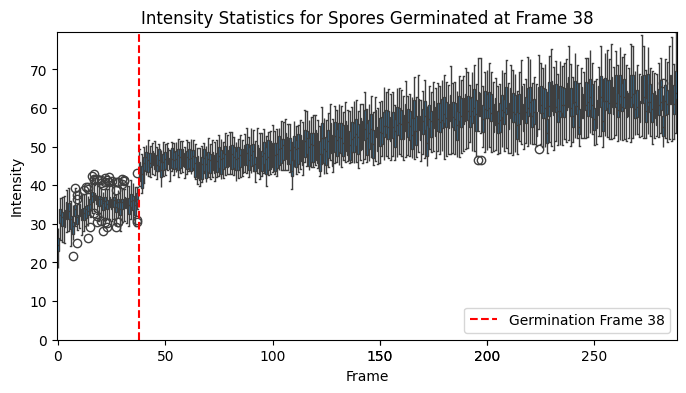

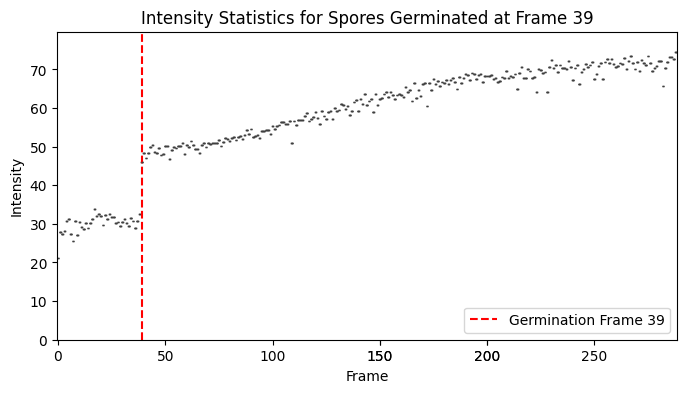

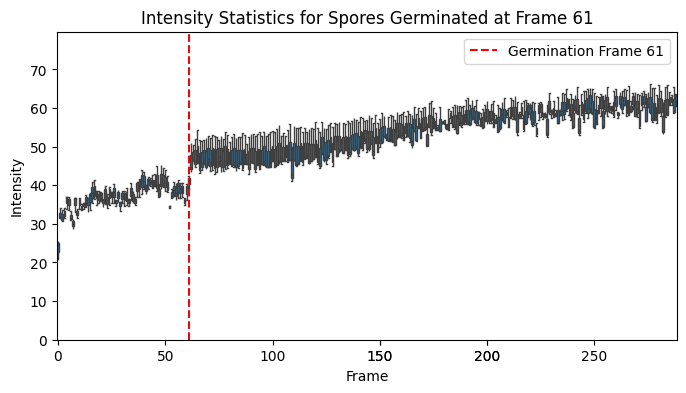

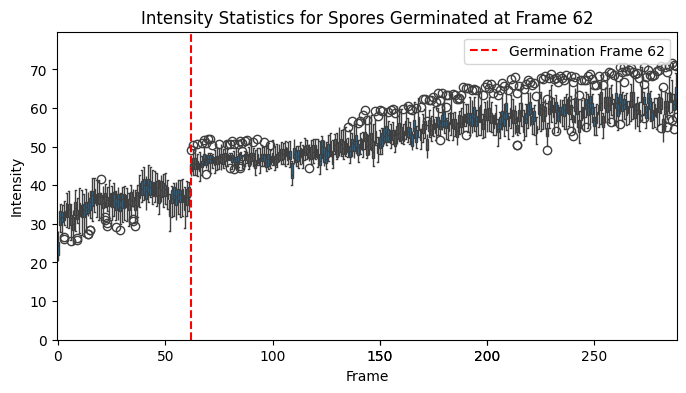

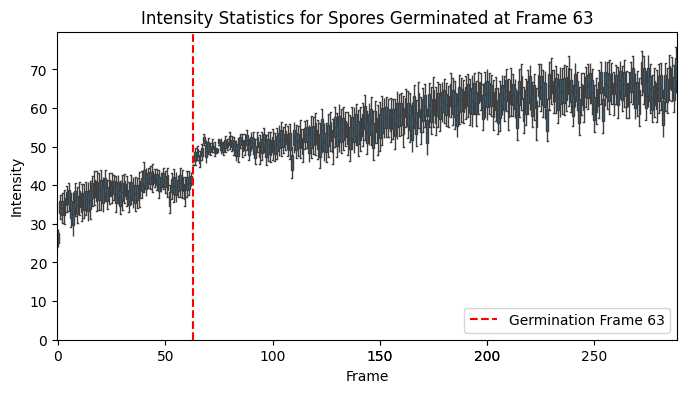

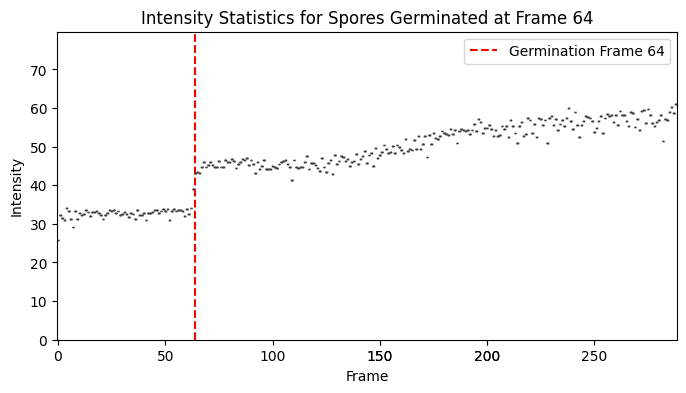

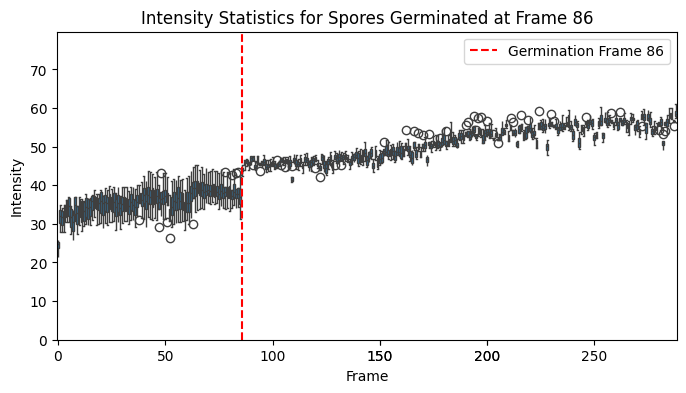

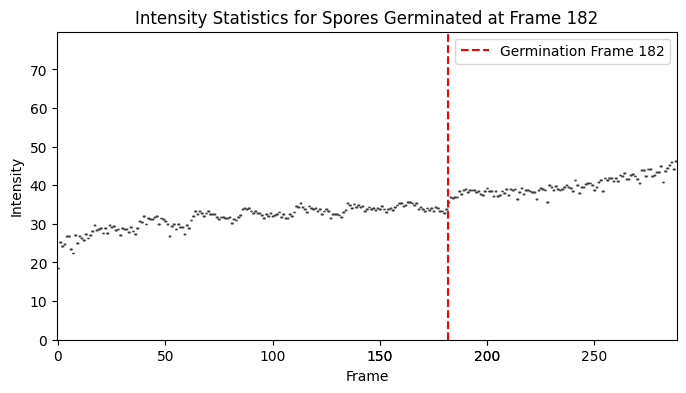

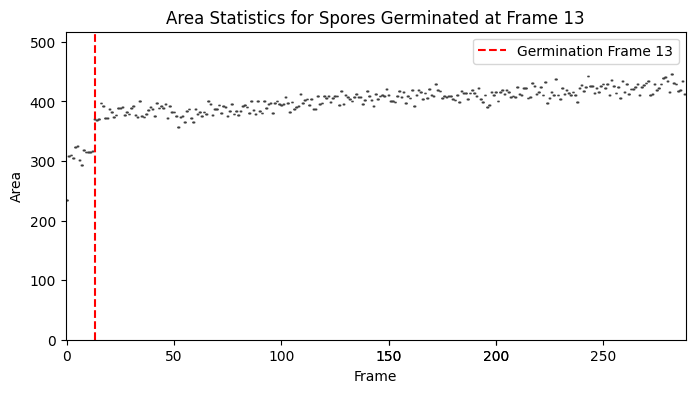

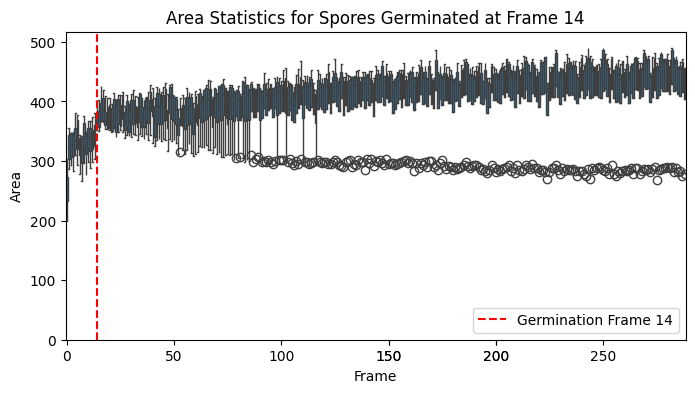

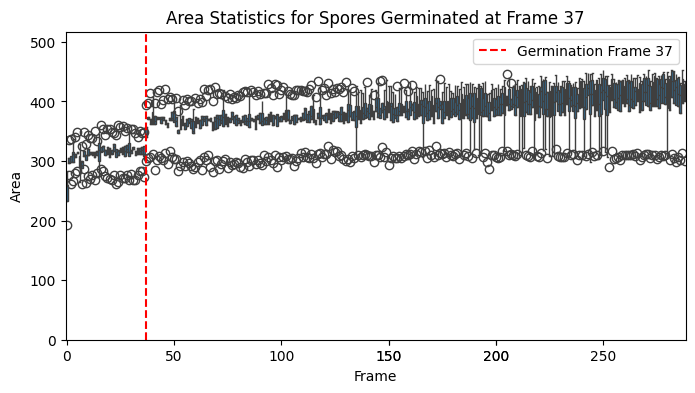

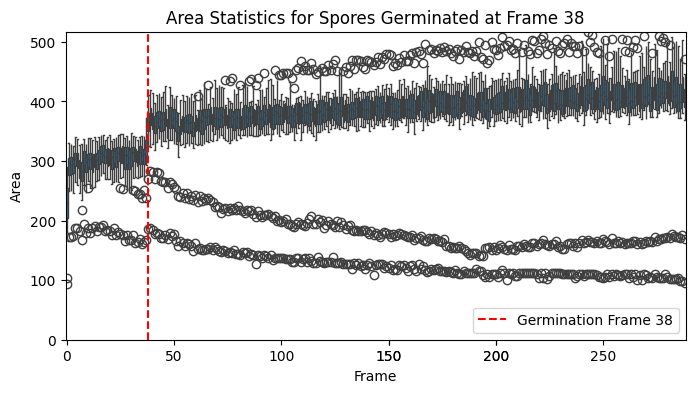

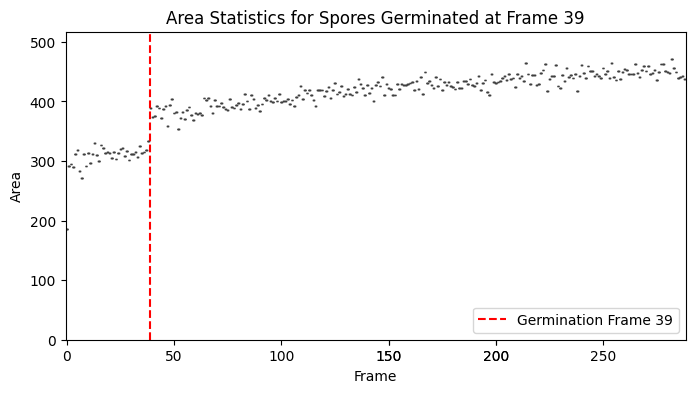

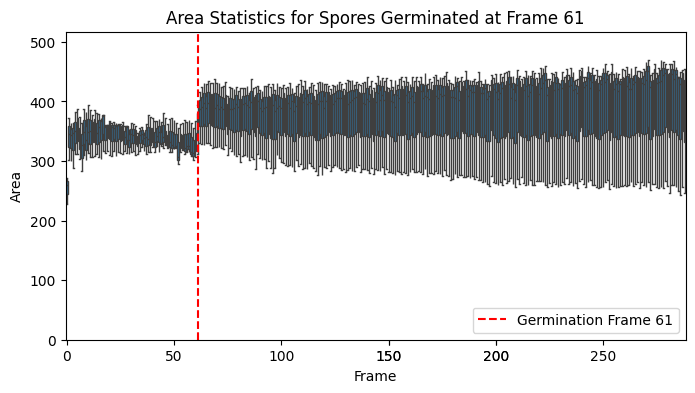

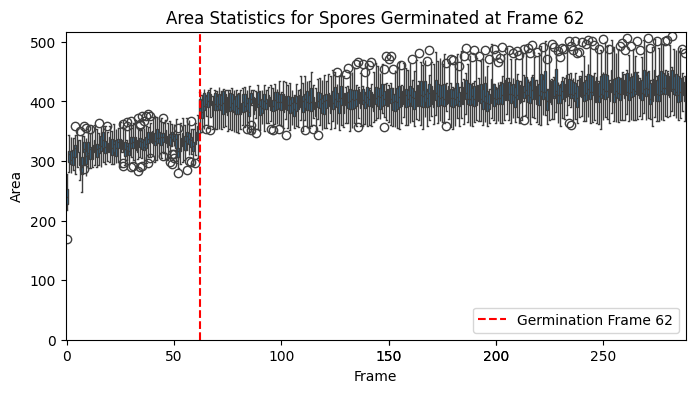

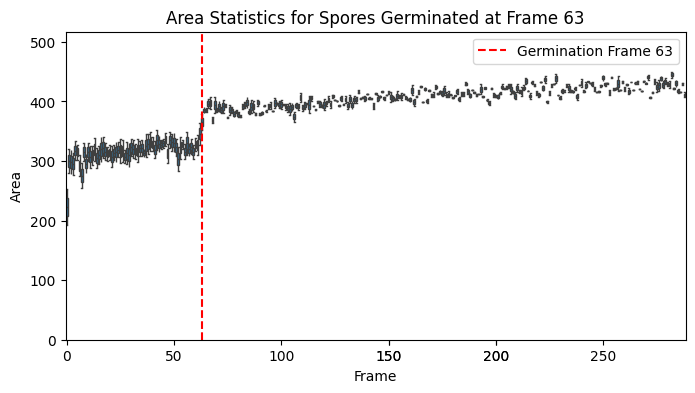

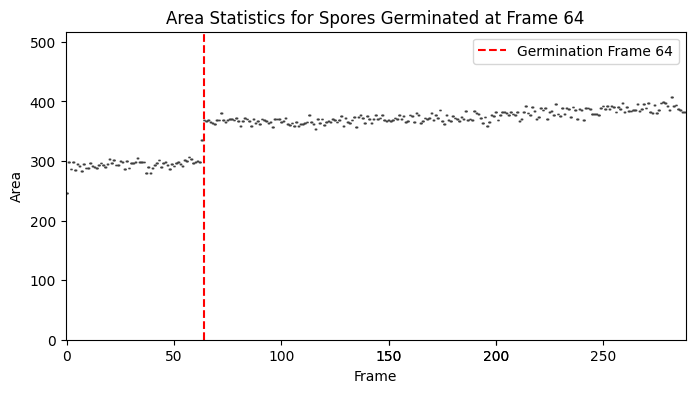

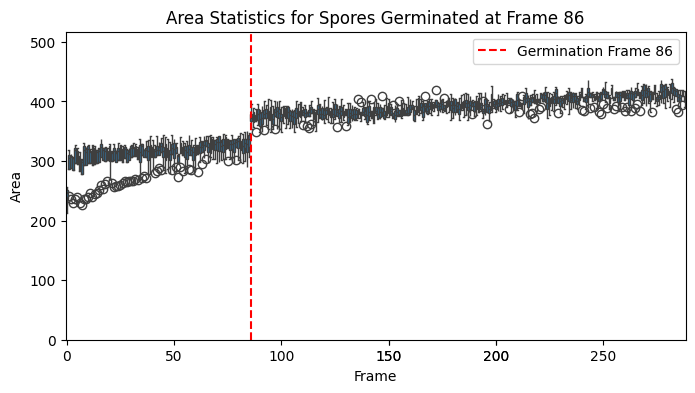

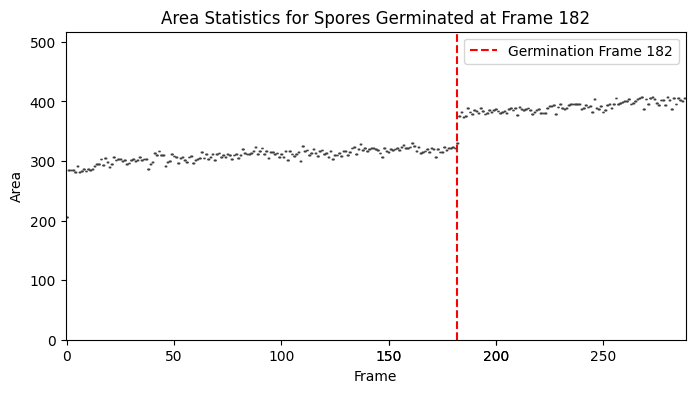

In [17]:
'''
Spores are grouped by germination frame then statistics are gathered at each timepoint (mix, median, max, q1, and q3)
'''
data_stats = df

# Convert feature and germination data from strings to lists
data_stats['INTENSITY'] = data_stats['INTENSITY'].apply(ast.literal_eval)
data_stats['GERMINATION'] = data_stats['GERMINATION'].apply(ast.literal_eval)
data_stats['AREA'] = data_stats['AREA'].apply(ast.literal_eval)


data_stats['Germination Frame'] = data_stats['GERMINATION'].apply(lambda x: x.index(1)) #get germination frame where first "1" occurs 

grouped_data = data_stats.groupby('Germination Frame')

def get_max(feature: str):
    data_max = []
    data = data_stats[feature]
    for row in data:
        data_max.append(max(row))
    return max(data_max)


print(get_max("INTENSITY"))

def box_plot_statistics(column: str, feature: str):
    ymax = get_max(column)
    unique_germ_times = sorted(data_stats['Germination Frame'].unique())
    
    for germ_time in unique_germ_times:
        data_group = grouped_data.get_group(germ_time)
        aligned_data = [pd.Series(data) for data in data_group[column]]
        aligned_df = pd.DataFrame(aligned_data)
        melted_aligned_df = aligned_df.melt(var_name='Frame', value_name=feature) #long format
        
        # plotting
        plt.figure(figsize=(8, 4))
        sns.boxplot(x='Frame', y=feature, data=melted_aligned_df)
        plt.axvline(x=germ_time, color='red', linestyle='--', label=f'Germination Frame {germ_time}')
        plt.title(f'{feature} Statistics for Spores Germinated at Frame {germ_time}')
        plt.xlabel('Frame')
        plt.xticks([0, 50, 100, 150, 200, 150, 200, 250])
        plt.ylabel(feature)
        plt.ylim(0, ymax)
        plt.legend()
        plt.savefig(f"{plots_folder}  {feature} _boxplot_ + {germ_time} .jpg")

# call plotting for features
box_plot_statistics("INTENSITY", "Intensity")
box_plot_statistics("AREA", "Area")

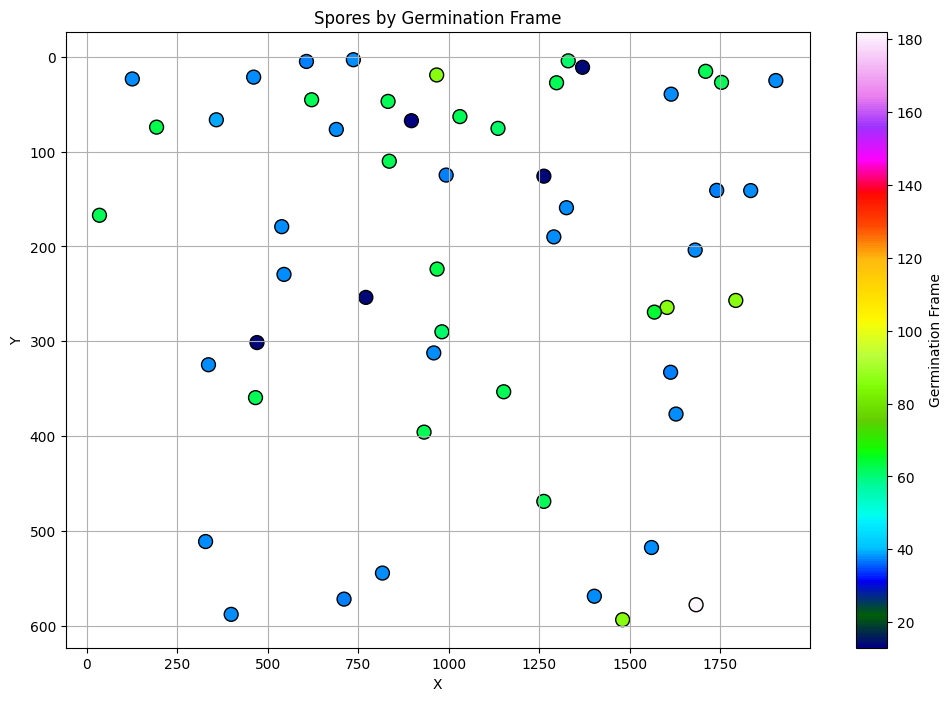

In [18]:
plt.figure(figsize=(12, 8))
#plot
scatter = plt.scatter(data_stats['X_POSITION'], data_stats['Y_POSITION'], c = data_stats['Germination Frame'], cmap = 'gist_ncar', edgecolor='black', s=100)
plt.colorbar(scatter, label='Germination Frame')
plt.xlabel('X')
plt.ylabel('Y')

plt.gca().invert_yaxis()
plt.title('Spores by Germination Frame')
plt.grid(True)
plt.savefig(f"{plots_folder}germinationframe_location.jpg")

###VALIDATE THIS overlay on tiff

In [19]:
#read in tif and overlay with scatter plot 